<a href="https://colab.research.google.com/github/SofiLebezova/tbd/blob/main/sin(x).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP sin(x)

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 534.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Генерируем значения для тестовой и тренировочной выборки

In [4]:
x = np.linspace(-2* np.pi, 2*np.pi, 100000)
y = np.sin(x)

In [5]:
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
x_train = np.linspace(-2* np.pi, 2*np.pi, 100000)
y_train = np.sin(x_train)

In [ ]:
x_test = np.linspace(-2*np.pi, 2*np.pi, 100000)
y_test = np.sin(x_test)

Строим архитектуру нейросети. Выбираем один скрытый слой с тремя нейронами на нем, входной слой также с тремя нейронами и выходной слой с одним нейроном на нем

In [6]:
model1 = Sequential([
    Dense(3, activation='sigmoid', input_shape=(1,)),
    Dense(3, activation='sigmoid'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22 (88.00 B)

 Trainable params: 22 (88.00 B)

 Non-trainable params: 0 (0.00 B)

Компилируем модель используя оптимизатор adam и метрику по которой будет просиходить обучение MSE

In [8]:
model1.compile(optimizer='adam', loss='mean_squared_error')

Обучаем нашу модель

In [9]:
history1 = model1.fit(x_train, y_train, epochs=11, verbose=1, validation_split=0.2, validation_steps=1)

Epoch 1/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4647 - val_loss: 0.4302
Epoch 2/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4352 - val_loss: 0.4275
Epoch 3/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4312 - val_loss: 0.4232
Epoch 4/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4303 - val_loss: 0.4220
Epoch 5/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4305 - val_loss: 0.4218
Epoch 6/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4308 - val_loss: 0.4226
Epoch 7/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4305 - val_loss: 0.4209
Epoch 8/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4303 - val_loss: 0.4214
Epoch 9/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4276 - val_loss: 0.4200
Epoch 10/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4288 - val_loss: 0.4200
Epoch 11/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4316 - val_loss: 0.4199


In [10]:
y_pred1 = model1.predict(x_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step


Выводим метрики для определения точности модели MSE =
$\frac{1}{n}\sum\limits_{i=1}^{n}(y_{i}-\widehat{y}_{i})^2 $ , а RMSE показвает квадрат от MSE

In [11]:
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print(mse1)
print(rmse1)

0.4284077377615067
0.6545286378467383


Строим кривую обучения по эпохам

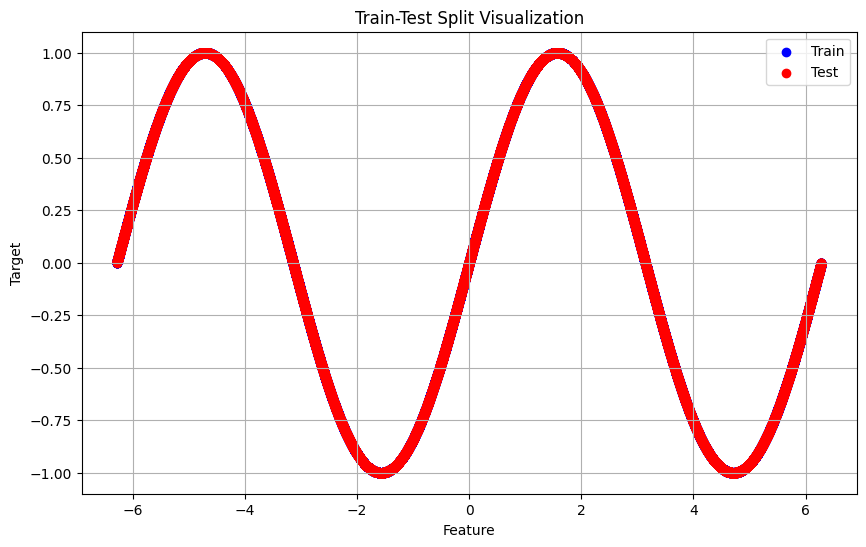

In [15]:
plt.figure(figsize=(10, 6))

# Тренировочные данные (синие точки)
plt.scatter(x_train, y_train, color='blue', label='Train')

# Тестовые данные (красные точки)
plt.scatter(x_test, y_test, color='red', label='Test')

plt.title('Train-Test Split Visualization')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

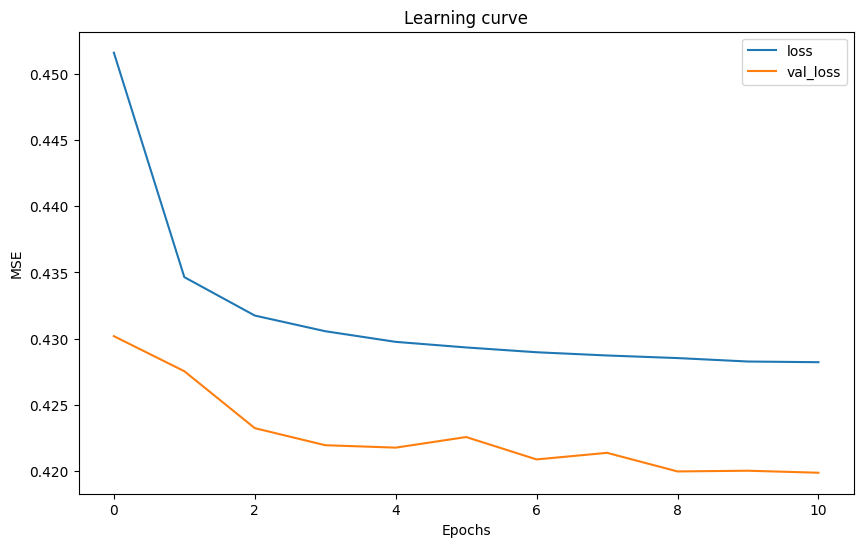

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.legend()
plt.grid(False)
plt.show()

In [16]:
(x_train1, x_test1, y_train1, y_test1) = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
x_train1 = np.linspace(-2* np.pi, 2*np.pi, 100000)
y_train1 = np.sin(x_train)

Строим похожую архитектуру, но уже с 6 нейронами на слоях

In [17]:
model2 = Sequential([
    Dense(6, activation='sigmoid', input_shape=(1,)),
    Dense(6, activation='sigmoid'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model2.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 6)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history2 = model2.fit(x_train1, y_train1, epochs=11, verbose=1, validation_split=0.2, validation_steps=1)

Epoch 1/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4443 - val_loss: 0.2306
Epoch 2/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1755 - val_loss: 0.1122
Epoch 3/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1069 - val_loss: 0.0949
Epoch 4/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0917 - val_loss: 0.0866
Epoch 5/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0834 - val_loss: 0.0821
Epoch 6/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0795 - val_loss: 0.0795
Epoch 7/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0782 - val_loss: 0.0781
Epoch 8/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0765 - val_loss: 0.0766
Epoch 9/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0748 - val_loss: 0.0765
Epoch 10/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0741 - val_loss: 0.0747
Epoch 11/11
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0726 - val_loss: 0.0734


In [21]:
y_pred2 = model2.predict(x_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step


Выводим метрики для определения точности модели MSE =
$\frac{1}{n}\sum\limits_{i=1}^{n}(y_{i}-\widehat{y}_{i})^2 $ , а RMSE показвает квадрат от MSE

In [22]:
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(mse2)
print(rmse2)

0.07154504298432207
0.267479051486882


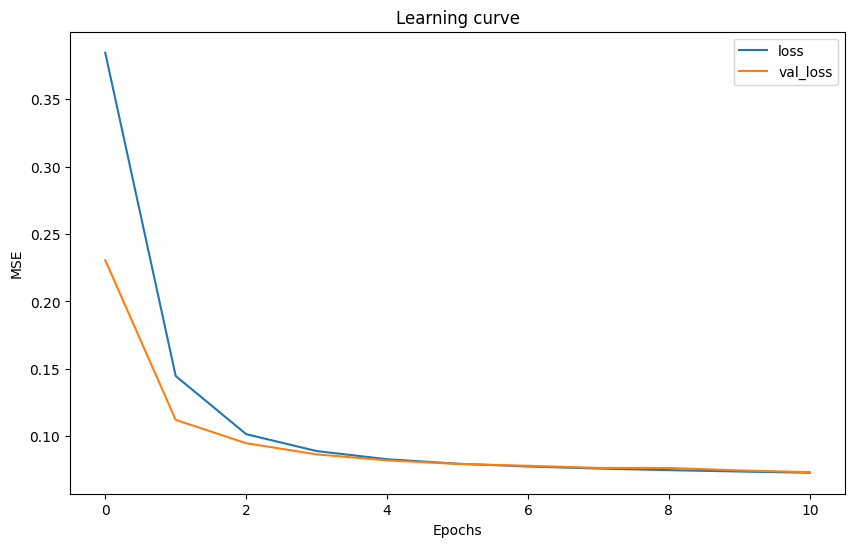

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
print(x_test)
print(y_pred1)


[ 3.23229134  3.79313407 -3.78697649 ... -1.52525849  0.42996267
 -0.95373424]
[[-0.2264866 ]
 [-0.2659254 ]
 [ 0.23305827]
 ...
 [ 0.09604368]
 [-0.03239095]
 [ 0.05933669]]


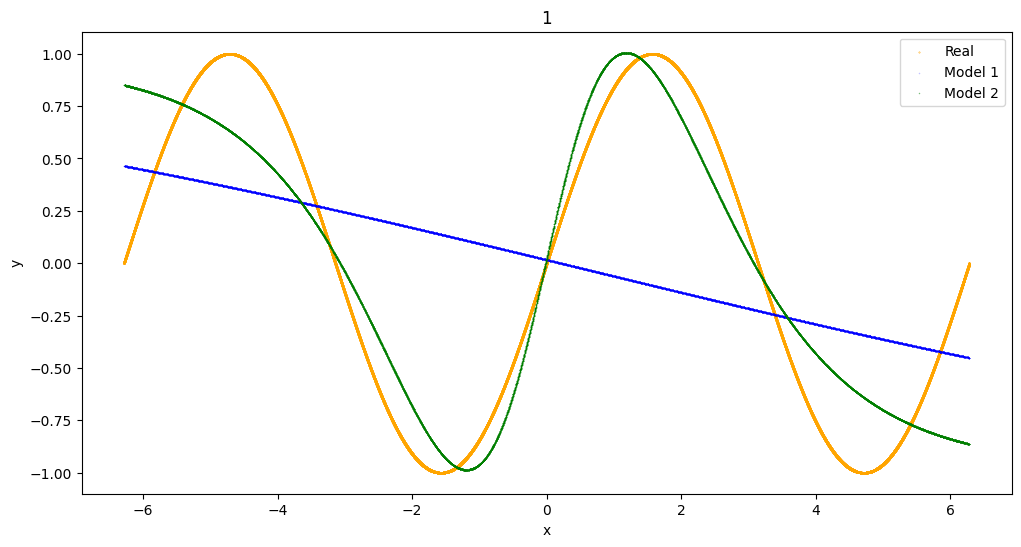

In [61]:
# Создаем график
plt.figure(figsize=(12, 6))

plt.scatter(x, y, color='orange',s=0.1, label='Real')
# Первое разбиение (x_train1, y_train1) - синие кружки
plt.scatter(x_test, y_pred1, color='blue',s=0.8, label='Model 1', lw=0.2, alpha=0.2)

# Второе разбиение (x_train, y_train) - красные треугольники
plt.scatter(x_test1, y_pred2, color='green',s=0.8, label='Model 2', lw=0.1, alpha=0.5)

plt.title('1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# MLP cos(3πx/2)

Строим ту же модель для функции cos(3πx/2)

In [ ]:
x_train2 = np.linspace(0, 1, 10000)
y_train2 = np.cos((3*np.pi)*x_train2/2)

In [ ]:
x_test2 = np.linspace(0, 1, 10000)
y_test2 = np.cos((3*np.pi)*x_test2/2)

In [ ]:
model3 = Sequential([
    Dense(6, activation='sigmoid', input_shape=(1,)),
    Dense(6, activation='sigmoid', input_shape=(1,)),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61 (244.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, mode='min')
history3 = model3.fit(x_train2, y_train2, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0158 - val_loss: 0.5301
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6242 - val_loss: 0.1627
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5209 - val_loss: 0.1264
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5171 - val_loss: 0.1107
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5039 - val_loss: 0.1081
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4918 - val_loss: 0.0976
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4742 - val_loss: 0.0867
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4364 - val_loss: 0.0781
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3884 - val_loss: 0.0657
Epoch 10/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3139 - val_loss: 0.0775
Epoch 11/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2156 - val_loss: 0.1537
Epoch 12/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
y_pred3 = model3.predict(x_test2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
mse3 = mean_squared_error(y_test2, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test2, y_pred3))
print(mse3)
print(rmse3)

0.11643232470529326
0.34122181159077924


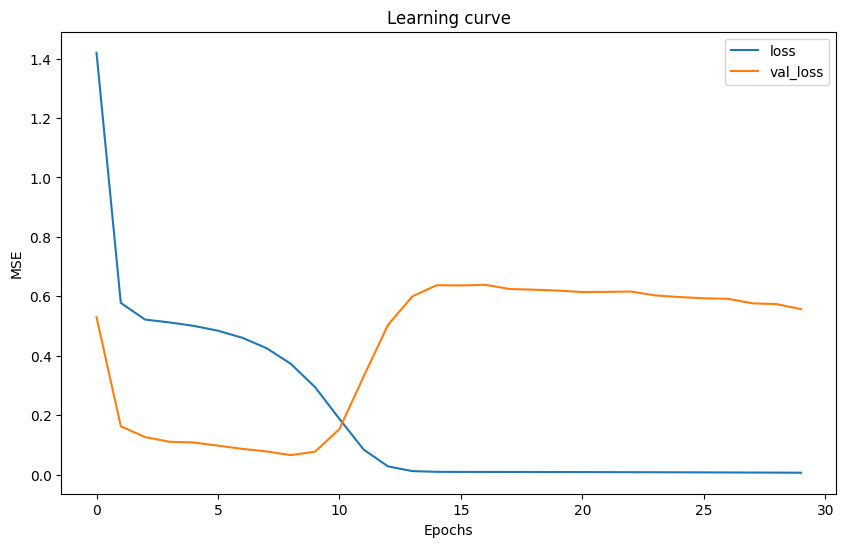

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Learning curve')
plt.legend()
plt.grid(False)
plt.show()

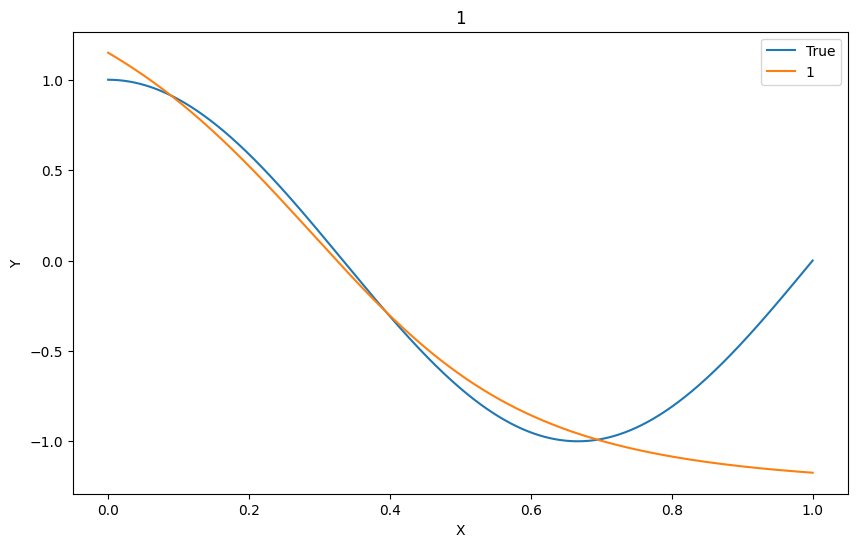

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_test2, y_test2,label='True')
plt.plot(x_test2, y_pred3,label='1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('1')
plt.legend()
plt.grid(False)
plt.show()